## Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm
import pickle


### Api Key

In [1]:
client_id = 'hQmW_N-oAuBKvmHmmF5Ltg'
api_key = '-xfnZF7NwPGrMpJUEY99Oc9hL_zP4B8l5oB7OYkTsHsl1FsfAteGNT_uHWay_CFD_a90yoD7bvqgugeJmQq_iyu0K9Ks1n8_zzEiskRRQQHdO3xXFemvf2loxA07XXYx'

## Helper Functions

In [2]:
#api calls
def yelp_call(url_params, api_key):

    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    data = response.json()['businesses']
    return data

In [3]:
#API call for 1000 restaurants
def all_results(url_params, api_key):
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {'Authorization': 'Bearer {}'.format(api_key)}
    response = requests.get(url, headers=headers, params=url_params)
    num = response.json()['total']
    print('{} total matches found.'.format(num))
    cur = 0
    results = []
    while cur < num and cur < 1000:
        url_params['offset'] = cur
        results.append(yelp_call(url_params, api_key))
#         time.sleep(1) #Wait a second
        cur += 50
    return results

In [4]:
#Params
term = 'Restaurants'
location = 'Queens'
url_params = {  'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit' : 50
             }

In [33]:
## API Call for 1000 Restaurants

In [7]:
#Getting info using function created previously
all_restaurants = all_results(url_params, api_key)
print(len(all_restaurants))

14700 total matches found.
20


In [8]:
all_restaurants[0][0]

{'id': 'jWuUibgnTGsJibOrr6UUSw',
 'alias': 'haidilao-hotpot-flushing',
 'name': 'Haidilao Hotpot',
 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/WiGBUxZsBHYIMiUMQTTH7Q/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/haidilao-hotpot-flushing?adjust_creative=hQmW_N-oAuBKvmHmmF5Ltg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=hQmW_N-oAuBKvmHmmF5Ltg',
 'review_count': 349,
 'categories': [{'alias': 'hotpot', 'title': 'Hot Pot'},
  {'alias': 'chinese', 'title': 'Chinese'}],
 'rating': 4.5,
 'coordinates': {'latitude': 40.7612633, 'longitude': -73.8280301},
 'transactions': ['restaurant_reservation'],
 'location': {'address1': '138-23 39th Ave',
  'address2': None,
  'address3': None,
  'city': 'Flushing',
  'zip_code': '11354',
  'country': 'US',
  'state': 'NY',
  'display_address': ['138-23 39th Ave', 'Flushing, NY 11354']},
 'phone': '+19172318888',
 'display_phone': '(917) 231-8888',
 'distance': 3917.613612791124}

## Parse API Data for Relevatn Info

In [9]:
#function to parse the data and keep only the parts of each entry that we need
def parse_api(data):
    parsed_data = []
    final_parsed_restaurants = []
    for i in range(len(data)):
        for j in range(50):
            parsed_data.append(data[i][j])
    
    #create a list with SQL tables columnns names
    for parsed_restaurant in parsed_data:
        if 'price' in parsed_restaurant.keys():
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': parsed_restaurant['price'],'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
        else:
            final_parsed_restaurants.append({'restaurant_id': parsed_restaurant['id'],'restaurant_name': parsed_restaurant['name'],
                         'price': "",'rating': parsed_restaurant['rating'],
                         'review_count': parsed_restaurant['review_count']})
    return final_parsed_restaurants

In [10]:
#call the function and return a list with only the columns names we need
parsed_restaurants_v1 = parse_api(all_restaurants)

In [11]:
len(parsed_restaurants_v1)

1000

In [12]:
parsed_restaurants_v1

[{'restaurant_id': 'jWuUibgnTGsJibOrr6UUSw',
  'restaurant_name': 'Haidilao Hotpot',
  'price': '',
  'rating': 4.5,
  'review_count': 349},
 {'restaurant_id': '3n6i8TwGEIL9KnCCHUyiqA',
  'restaurant_name': 'Sai',
  'price': '',
  'rating': 5.0,
  'review_count': 46},
 {'restaurant_id': 'MNNpsRXe7Wt5m3Jla9Wk0w',
  'restaurant_name': 'The Alcove',
  'price': '$$',
  'rating': 5.0,
  'review_count': 792},
 {'restaurant_id': 'uthkinOdYCrM0j-5tYC63w',
  'restaurant_name': 'Long King House',
  'price': '',
  'rating': 4.5,
  'review_count': 16},
 {'restaurant_id': '00jHmlu0elBhzBsw7Y5pww',
  'restaurant_name': "Jack & Nellie's",
  'price': '$$',
  'rating': 4.0,
  'review_count': 649},
 {'restaurant_id': 'o_r0-1tGDoP_HyEONWKqCw',
  'restaurant_name': 'Mojo Restaurant',
  'price': '$$',
  'rating': 4.0,
  'review_count': 136},
 {'restaurant_id': '6Guo-aozyLnQFtAuP8ZXZg',
  'restaurant_name': 'Queens Comfort',
  'price': '$$',
  'rating': 4.0,
  'review_count': 2055},
 {'restaurant_id': '1Uta

In [13]:
df = pd.DataFrame.from_dict(parsed_restaurants_v1)

In [13]:
df.head()

,price,rating,restaurant_id,restaurant_name,review_count
0,,4.5,2-z6dRAkKupCyz1LF251pQ,Jintana Thai Farmhouse,60
1,,5.0,E8gpCgCVaO2hNEPTrh4n2A,The Ryerson,28
2,$$,4.0,49ST--X1jcIPzUIM1O3K6w,Mominette,652
3,$$,4.0,GA5msU6NO9rQRctPfDJCBg,Peaches HotHouse,1117
4,$$,4.5,GxMhN2PEttvw7CRGIzB6Gg,Baron's,268


In [14]:
#exporting data to excel for partner to use
df.to_excel("Restaurant_Queens.xlsx")

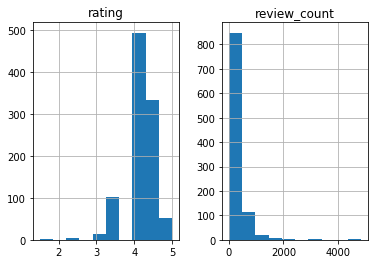

In [15]:
df.hist()
plt.show()

### Prepping for Full Scrape

In [16]:
restaurant_id_list = list(df.restaurant_id)

In [17]:
restaurant_id_list

['jWuUibgnTGsJibOrr6UUSw',
 '3n6i8TwGEIL9KnCCHUyiqA',
 'MNNpsRXe7Wt5m3Jla9Wk0w',
 'uthkinOdYCrM0j-5tYC63w',
 '00jHmlu0elBhzBsw7Y5pww',
 'o_r0-1tGDoP_HyEONWKqCw',
 '6Guo-aozyLnQFtAuP8ZXZg',
 '1UtavhY5umBJPJkP2jJGMw',
 'NVp1S29NLR573Lc4ZvICKw',
 'iMMwN2ueNQviV6FOAT8vNw',
 '3GMHPnrkFAcqffw3T7JSdQ',
 'kSI-wgcYYfpcHcgDrbKIfg',
 'rR5Y9mp2Yob3rgetJscPWQ',
 'AawLwOYZwMf_9wkShExfuw',
 'PxzhCMoWEIe2nrNz1ISq7w',
 'MhGjWgAFFyb6QMwUIkhpBQ',
 'Duh9gmBVHodHKQaQqsyZcg',
 'k5bGHJbAXDw9g_uP42QqDw',
 'Sj3JYCbaEFrAqUzRrenQbg',
 '20LSOx_4K2wghTsUx4gSsg',
 'sxngBOOFdKJ2Ogiy6GRyqw',
 'tQcAwscj_LJ1hPtoJ_U_MA',
 'jfOMJ8y3llPbVJosDybLMw',
 'gEEqoeSekTOjRVmyY4fplA',
 'NcHnZbq06y9llCt6ayf_Jw',
 'AkRdoWYv2QmsXD9LSWl2zw',
 '741IMLpXPq755tDaEYXAtA',
 '1ZKbUeFAs0ltSnAYq4ELKw',
 'W0sXHSSpkiMEDJiBmSLNYQ',
 'JT-0_-OqmBLYzEvRhU-__w',
 '7xxlBDcXm7wwJW5OVD5bFQ',
 'YgQ1AVY9JLSMjSRX3Hzj1g',
 'FC2uST9JpPCFmjDcMDVZMA',
 'zekbMn7KWtzxTFLtfEqb1w',
 'iXV4FMZPru7BB_nwN_8mVw',
 '0SakkRuHhECsDsZ8mRkisQ',
 'FpKdZAQ6ecHZW3_HdeGVdA',
 

## Test Scrape for 1 Restaurant

In [18]:
# creating the link to access the reviews
url_prefix = 'https://www.yelp.com/biz/'
url_suffix = '?rh_type=phrase'
test_id = '00jHmlu0elBhzBsw7Y5pww'
full_url = url_prefix+test_id+url_suffix

In [19]:
full_url

'https://www.yelp.com/biz/00jHmlu0elBhzBsw7Y5pww?rh_type=phrase'

In [20]:
source = requests.get(full_url).text

In [21]:
source

'<!DOCTYPE HTML>\n\n<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->\n<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->\n<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!--> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="no-js" lang="en"> <!--<![endif]-->\n    <head>\n        <script>\n            (function() {\n                var main = null;\n\n                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(

In [22]:
soup = BeautifulSoup(source,'lxml')

In [23]:
print(soup.prettify())

<!DOCTYPE HTML>
<!--[if lt IE 7 ]> <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie6 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 7 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie7 ie ltie9 ltie8 no-js" lang="en"> <![endif]-->
<!--[if IE 8 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie8 ie ltie9 no-js" lang="en"> <![endif]-->
<!--[if IE 9 ]>    <html xmlns:fb="http://www.facebook.com/2008/fbml" class="ie9 ie no-js" lang="en"> <![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml">
 <!--<![endif]-->
 <head>
  <script>
   (function() {
                var main = null;

                var main=function(){window.onerror=function(k,a,c,i,f){var j=(document.getElementsByTagName("html")[0].getAttribute("webdriver")==="true"||navigator.userAgent==="selenium");var h=f&&(f.name==="ServerSideRenderingError"||f.name==="CSRFallbackError");if(j&&!h){document.body.innerHTML=

In [24]:
reviews_section = soup.find(class_='lemon--span__373c0__3997G',lang='en')


In [25]:
reviews_section

<span class="lemon--span__373c0__3997G" lang="en">I've passed by this place many times and I was finally able to come here for brunch! Came here with my BFF who drove all the way from Philly to spend the day with me! I was surprised that there was no line on a Saturday but thank God cause we were starving!!<br/><br/>The ambiance is very rustic/casual and the menu is small which I like: quality over quantity. I ordered the french toast with a side of bacon and she ordered the steak &amp; eggs if I remember correctly. I also ordered a bloody mary which was THE BOMB!<br/><br/>The french toast was nice and light with the combination of fruits was delicious but I was thankful I ordered the bacon cause it really hit the spot. BFF said her order was also very good. <br/><br/>I came back again for dinner on a different day and it was...okayy. I would prefer coming back here for brunch again and definitely ordering the bloody mary again!</span>

In [26]:
reviews_section.text

"I've passed by this place many times and I was finally able to come here for brunch! Came here with my BFF who drove all the way from Philly to spend the day with me! I was surprised that there was no line on a Saturday but thank God cause we were starving!!The ambiance is very rustic/casual and the menu is small which I like: quality over quantity. I ordered the french toast with a side of bacon and she ordered the steak & eggs if I remember correctly. I also ordered a bloody mary which was THE BOMB!The french toast was nice and light with the combination of fruits was delicious but I was thankful I ordered the bacon cause it really hit the spot. BFF said her order was also very good. I came back again for dinner on a different day and it was...okayy. I would prefer coming back here for brunch again and definitely ordering the bloody mary again!"

In [27]:
all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
all_reviews_section

[<span class="lemon--span__373c0__3997G" lang="en">I've passed by this place many times and I was finally able to come here for brunch! Came here with my BFF who drove all the way from Philly to spend the day with me! I was surprised that there was no line on a Saturday but thank God cause we were starving!!<br/><br/>The ambiance is very rustic/casual and the menu is small which I like: quality over quantity. I ordered the french toast with a side of bacon and she ordered the steak &amp; eggs if I remember correctly. I also ordered a bloody mary which was THE BOMB!<br/><br/>The french toast was nice and light with the combination of fruits was delicious but I was thankful I ordered the bacon cause it really hit the spot. BFF said her order was also very good. <br/><br/>I came back again for dinner on a different day and it was...okayy. I would prefer coming back here for brunch again and definitely ordering the bloody mary again!</span>,
 <span class="lemon--span__373c0__3997G" lang="e

## Scrape for All 1000 Restaurants

In [28]:
reviews=[]
for i in range(len(all_reviews_section)):
    reviews.append({i:all_reviews_section[i].text})

In [29]:
reviews

[{0: "I've passed by this place many times and I was finally able to come here for brunch! Came here with my BFF who drove all the way from Philly to spend the day with me! I was surprised that there was no line on a Saturday but thank God cause we were starving!!The ambiance is very rustic/casual and the menu is small which I like: quality over quantity. I ordered the french toast with a side of bacon and she ordered the steak & eggs if I remember correctly. I also ordered a bloody mary which was THE BOMB!The french toast was nice and light with the combination of fruits was delicious but I was thankful I ordered the bacon cause it really hit the spot. BFF said her order was also very good. I came back again for dinner on a different day and it was...okayy. I would prefer coming back here for brunch again and definitely ordering the bloody mary again!"},
 {1: "The food was great but the service could've been better. We felt rushed from beginning w to the end when we received the check

In [31]:
def scrape_list(list_id):
    reviews=[]
    for resto_id in tqdm(list_id):
        url_prefix = 'https://www.yelp.com/biz/'
        url_suffix = ['?rh_type=phrase','?start=20', '?start=40', '?start=60', '?start=80', '?start=100']
        for suf in url_suffix:
            test_id = resto_id
            full_url = url_prefix+test_id+suf
        
            source = requests.get(full_url).text
            soup = BeautifulSoup(source,'html')
            all_reviews_section = soup.find_all(class_='lemon--span__373c0__3997G',lang='en')
            
            for i in range(len(all_reviews_section)):
                reviews.append((test_id,all_reviews_section[i].text))
            with open('reviews_loop3.pkl', 'wb') as f:
                pickle.dump(reviews, f)
    return reviews  

In [32]:
full_reviews = scrape_list(restaurant_id_list)

100%|██████████| 1000/1000 [8:10:57<00:00, 28.45s/it] 


In [61]:
len(full_reviews)

115660

In [62]:
full_reviews

[('ehUuSk5gPTCQmwS_ubgKRA',
  "Had a reservation on Saturday night for dinner. Everything we ordered was incredible. We started with half a dozen oysters and the tuna tartare. Oysters were fresh and tasty. Tuna tartare was really yummy, it came served with bread but I would've enjoyed plantain chips too. For entrees, we split the scallops and grilled octopus. Both were flavorful and cooked to perfection. I want to come back for happy hour!"),
 ('ehUuSk5gPTCQmwS_ubgKRA',
  "While it's not my new go-to place for seafood, I still liked it.Came here on a Sunday night -- made a reservation through Yelp -- and it was pretty packed. I saw some people were turned away, so definitely make a reservation just in case.My friend and I just went straight to entrees: surf and turf (hangar steak and grilled shrimp with sugar snap peas, fingerling potatoes, & balsamic reduction) and the scallops special (deep diver scallops over mushroom brown rice risotto). Both dishes were delish and what think is re

## Save Data

In [64]:
import pickle
 
with open('reviews_v3.pkl', 'wb') as f:
    pickle.dump(full_reviews, f)

In [ ]:
len(tuple_reviews)

In [66]:
data = pd.DataFrame(full_reviews,columns=['Restaurant_Id','Review'])

In [67]:
data.to_csv('reviews_queens.csv')